## Exercício 2 - Análise Data Scraping ML

### A partir do arquivo *ml_4k.csv*:

### 1 - Importe as bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### 2 - Leitura do arquivo em um Dataframe

In [2]:
tv = pd.read_csv('ml_4k.csv')

### 3 - Análise preliminar do Dataframe

In [3]:
tv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2038 entries, 0 to 2037
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2038 non-null   int64 
 1   title       2038 non-null   object
 2   brand       2038 non-null   object
 3   model       2038 non-null   object
 4   size        2038 non-null   int64 
 5   price       2038 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 95.7+ KB


In [4]:
tv.head()

,Unnamed: 0,title,brand,model,size,price
0,0,"Smart Tv Philips 70 4k 70pug7625/78, Wifi, 3 H...",Philips,70PUG7625/78,70,6199
1,1,Tv LG 55'' 55us660h0sd Uhd 4k Ips Com Hotel Pr...,LG,55US660H0SD.BWZ,55,2999
2,2,Smart TV Samsung Series 8 UN55TU8000GXZD UDH 4...,Samsung,UN55TU8000,55,4299
3,3,"Smart TV TCL 50P715 DLED 4K 50"" 100V/240V",TCL,50P715,50,2799
4,4,"Smart Tv Philips 55 4k 55pug7625/78, Wifi, 3 H...",Philips,55PUG7625/78,55,3799


### 4 - Elimine as informações desnecessárias para as análises

In [5]:
tv = tv.drop(columns = ['Unnamed: 0'])
tv.head()

,title,brand,model,size,price
0,"Smart Tv Philips 70 4k 70pug7625/78, Wifi, 3 H...",Philips,70PUG7625/78,70,6199
1,Tv LG 55'' 55us660h0sd Uhd 4k Ips Com Hotel Pr...,LG,55US660H0SD.BWZ,55,2999
2,Smart TV Samsung Series 8 UN55TU8000GXZD UDH 4...,Samsung,UN55TU8000,55,4299
3,"Smart TV TCL 50P715 DLED 4K 50"" 100V/240V",TCL,50P715,50,2799
4,"Smart Tv Philips 55 4k 55pug7625/78, Wifi, 3 H...",Philips,55PUG7625/78,55,3799


### 5 - Análises

#### - Qual o maior valor de uma TV 4K no ML?
#### - Qual o valor médio de uma TV 4K no ML?
#### - Qual o menor de uma TV 4K no ML?

### Note que há uma variação muito grande de valores, que são denominados dados atípicos ou _outliers_. Descubra uma forma de descobrir e eliminar esses dados de sua amostra de dados.

In [6]:
tv['price'].max()

82612

In [7]:
tv['price'].mean()

2400.7173699705595

In [8]:
tv['price'].min()

7

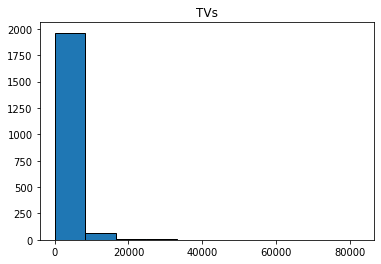

In [9]:
plt.title('TVs')
plt.hist(tv['price'], edgecolor = 'black', linewidth=1)
plt.show()

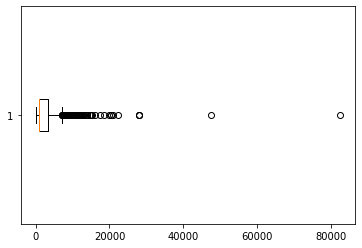

In [10]:
plt.boxplot(tv['price'], vert = False)
plt.show()

In [11]:
#calculando o 1° e 3° quartil

q1 = tv['price'].quantile(0.25)
q3 = tv['price'].quantile(0.75)
iqr = q3 - q1

In [12]:
# calculando o valor superior e o inferior

v_in = (q1 - 1.5 * iqr)
v_su = (q3 + 1.5 * iqr)


In [13]:
#encontrando os outliers

out = (tv['price']< v_in) | (tv['price']> v_su)
outliers = tv[out]
outliers

,title,brand,model,size,price
24,"Smart TV LG AI ThinQ 75UN801C LED 4K 75"" 110V/...",LG,75UN801C,75,7299
37,Smart Tv Samsung 75 Polegadas 4k Uhd Crystal U...,Samsung,UN75TU7020GXZD,75,7369
38,"Smart TV Samsung UN75TU8000GXZD LED 4K 75""",Samsung,UN75TU8000,75,7779
51,"Smart TV LG AI ThinQ 82UN8000PSB LED 4K 82"" 10...",LG,82UN8000,82,11768
64,Smart Tv Led Pro Uhd 4k LG 75 75un801c Thinq A...,LG,75UN801C,75,7299
...,...,...,...,...,...
1802,Smart Tv Qled Uhd 4k Hdr 65 Samsung 65q80t Pre...,Samsung,QN65Q80TA,65,9518
1845,Smart Tv 4k 65 Ptv65f80sns Philco Bivolt,Philco,PHILCO,65,7599
1904,Smart Tv 4k 65 Ptv65f80sns Philco Bivolt,Philco,PHILCO,65,7599
2014,Smart Tv 4k LG Led 82 Google Alexa Wi-fi - 82u...,LG,82UN8000PSB,82,11768


In [32]:
#obtendo as informações sem os outliers

sem = (tv['price']>= v_in) & (tv['price']<= v_su)
tv = tv[sem]
tv

,title,brand,model,size,price
0,"Smart Tv Philips 70 4k 70pug7625/78, Wifi, 3 H...",Philips,70PUG7625/78,70,6199
1,Tv LG 55'' 55us660h0sd Uhd 4k Ips Com Hotel Pr...,LG,55US660H0SD.BWZ,55,2999
2,Smart TV Samsung Series 8 UN55TU8000GXZD UDH 4...,Samsung,UN55TU8000,55,4299
3,"Smart TV TCL 50P715 DLED 4K 50"" 100V/240V",TCL,50P715,50,2799
4,"Smart Tv Philips 55 4k 55pug7625/78, Wifi, 3 H...",Philips,55PUG7625/78,55,3799
...,...,...,...,...,...
2033,Smart Tv LG Ai Thinq 60un7310psa Led 4k 60 10...,LG,15996576186,60,769
2034,Smart Tv LG Ai Thinq 65un7100psa Led 4k 65 10...,LG,15996576186,65,772
2035,Peças Tv Samsung Smart Tv Mu6120 58 Uhd 4k Un5...,Samsung,UN58MU6120,58,1815
2036,Peças Para Samsung 40 Smart Tv Led 40 Uhd 4k...,Samsung,UN40NU7100,40,645


### Com o dataframe já livre de outliers:

### - Quais são os 5 principais fabricantes (baseado na quantidade de anúncios de cada fabricante)

In [33]:
tv.brand.value_counts()


Samsung             651
LG                  624
TCL                 233
Philco              132
Philips              55
Semp                 43
Generic              43
Panasonic            31
Sony                 26
laço rolo            14
unbrand              10
HQ                   10
Multilaser            6
AOC                   5
Semp Toshiba          4
Aoc Linha Marrom      3
Nobrand               3
MiraScreen            3
Toshiba               3
CCE                   3
Semp TCL              3
JVC                   3
PHILCO SOUND          3
Neofix                2
Simple Mall           1
GTMedia               1
outros                1
Hevc                  1
FitaPro               1
smart tv              1
mx 4K                 1
Capte                 1
Apple                 1
Tny279pn              1
Name: brand, dtype: int64

<AxesSubplot:ylabel='brand'>

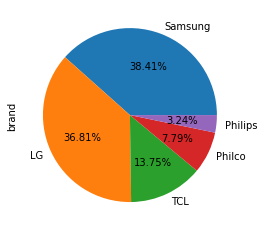

In [34]:
tv.brand.value_counts().head(5).plot(kind='pie', autopct='%.2f%%')

### - Quantos anúncios estão disponíveis desses fabricantes?

In [35]:
tv.brand.value_counts().head(5)

Samsung    651
LG         624
TCL        233
Philco     132
Philips     55
Name: brand, dtype: int64

### - Reduza o dataframe para os registros desses fabricantes apenas:

In [36]:
 df_remove = tv.loc[((tv['brand'] != 'Samsung')
                        & (tv['brand'] != 'LG') & (tv['brand'] != 'TCL')
                        & (tv['brand'] != 'Philco') & (tv['brand'] != 'Philips'))]
                             
tv = tv.drop(df_remove.index)
tv

,title,brand,model,size,price
0,"Smart Tv Philips 70 4k 70pug7625/78, Wifi, 3 H...",Philips,70PUG7625/78,70,6199
1,Tv LG 55'' 55us660h0sd Uhd 4k Ips Com Hotel Pr...,LG,55US660H0SD.BWZ,55,2999
2,Smart TV Samsung Series 8 UN55TU8000GXZD UDH 4...,Samsung,UN55TU8000,55,4299
3,"Smart TV TCL 50P715 DLED 4K 50"" 100V/240V",TCL,50P715,50,2799
4,"Smart Tv Philips 55 4k 55pug7625/78, Wifi, 3 H...",Philips,55PUG7625/78,55,3799
...,...,...,...,...,...
2033,Smart Tv LG Ai Thinq 60un7310psa Led 4k 60 10...,LG,15996576186,60,769
2034,Smart Tv LG Ai Thinq 65un7100psa Led 4k 65 10...,LG,15996576186,65,772
2035,Peças Tv Samsung Smart Tv Mu6120 58 Uhd 4k Un5...,Samsung,UN58MU6120,58,1815
2036,Peças Para Samsung 40 Smart Tv Led 40 Uhd 4k...,Samsung,UN40NU7100,40,645


### - Qual o tamanho da tela com o maior número de anúncios?

In [37]:
tv['size'].value_counts().head(1)

#tamanho da tela com maior número de anúncio é '55'

55    507
Name: size, dtype: int64

### - Dessas TV's com o maior número de anúncios, qual o fabricante e o modelo da TV mais cara?

In [42]:
caro = tv.loc[tv['size'] == 55]
caro.max()


title             Venda
brand               TCL
model    UN55TU8000GXZD
size                 55
price              6999
dtype: object

### - E da TV mais barata?

In [41]:
barato = tv.loc[tv['size'] == 55]
barato.min()

title    55  Uhd 4k Smart Tv Mu6400 - Tela Trincada
brand                                            LG
model                                 (62)996353634
size                                             55
price                                           250
dtype: object

### - Das TV's de 65", qual a média da valor por fabricante? Mostre graficamente.

In [51]:
m = tv.loc[tv['size'] == 65]
m

,title,brand,model,size,price
5,"Smart TV TCL 65P715 LED 4K 65"" 100V/240V",TCL,65P715,65,4499
13,"Smart Tv Philips 65 4k 65pug7625/78 Wifi, 3 Hd...",Philips,65PUG7625/78,65,5349
16,Smart TV Samsung Series Business LH65BETHVGGXZ...,Samsung,LH65BETHVG,65,4499
17,Samsung Smart Tv Crystal Uhd Tu7020 4k 2020 65...,Samsung,TU7020,65,4699
23,"Smart TV LG 65UN731C LED 4K 65"" 100V/240V",LG,65UN731C,65,4499
...,...,...,...,...,...
2004,Smart Tv Samsung Series 7 Un65tu7000gxzd Led 4...,Samsung,64999832142,65,772
2005,Smart Tv Led Hdr Uhd 4k 65 Tcl P715 Cinza Bivolt,TCL,65P715,65,6165
2013,Smart Tv LG Ai Thinq Oled65b9psb 4k 65 100v/240v,LG,15996576186,65,785
2032,Smart Tv LG Ai Thinq 65un7100psa Led 4k 65 10...,LG,15996576186,65,772


In [58]:
f = m.loc[m['brand'] == 'Samsung']
f['price'].mean()

2119.816513761468

In [59]:
lg = m.loc[m['brand'] == 'LG']
lg['price'].mean()

1648.879746835443

In [60]:
tcl = m.loc[m['brand'] == 'TCL']
tcl['price'].mean()

1797.0886075949368

In [61]:
philco = m.loc[m['brand'] == 'Philco']
philco['price'].mean()

1292.591836734694

In [62]:
philips = m.loc[m['brand'] == 'Philips']
philips['price'].mean()

4842.7

### - Qual marca oferece o maior número de anúncios de TV's de 65" de um único modelo? Qual modelo?

In [73]:
model = m.groupby(['brand', 'model']).size()
model

brand    model                              
LG       15996576186                            81
         64999832142                            31
         65NANO81                                2
         65NANO86                                4
         65SM8100psa                             1
         65UK6530                                1
         65UK6540                                1
         65UM7470                                1
         65UM7520                                1
         65UM7520PSB                             1
         65UM761C0SB                             1
         65UN7100                                5
         65UN7100PSA                             4
         65UN7310                               11
         65UN731C                                9
         65UN731COSC                             1
         OLED65C                                 2
         Smart TV                                1
Philco   15996576186                 

A marca LG oferece o maior número de anúncio do mesmo modelo, e o modelo é 15996576186

### - Baseado nos dados que você possui, qual marca e modelo de TV 4K recomendaria a aquisição? Justifique sua recomendação.

Eu recomendaria a Tv da marca Samsung, além de ser a mais anunciada o valor médio não está alto.